In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from pprint import pprint

In [13]:
train_orig_df = pd.read_csv('training.csv')

In [14]:
train_orig_df.head()

,id,posted_time,updated_time,age,updated_age,app_type,owner_id,owner_type,owner_influence,number_of_likes,...,participant5_id,participant5_action,participant5_gender,participant5_is_employee,participant5_is_lead,participant5_is_in_connections,participant5_focus,participant5_order,participant5_influence,rank
0,175339,1.514050e+12,1.514050e+12,6.315242e+10,6.315242e+10,other,57727,space,0.99973,1,...,3089,viewed,male,0,0,1,other,1,0.23077,0.73677
1,175348,1.514110e+12,1.515160e+12,6.309278e+10,6.204696e+10,forum,111913,space,0.99977,0,...,44661,viewed,male,0,0,1,other,1,0.23077,0.78240
2,175353,1.514120e+12,1.515160e+12,6.309049e+10,6.204716e+10,forum,111913,space,0.99977,0,...,3080,viewed,male,0,0,1,marketing,1,0.23077,0.82125
3,175371,1.514190e+12,1.514190e+12,6.301324e+10,6.301324e+10,other,9037,space,0.99949,0,...,3084,viewed,male,0,0,1,marketing,1,0.23077,0.61522
4,175372,1.514190e+12,1.514190e+12,6.301323e+10,6.301323e+10,other,9037,space,0.99949,0,...,3084,viewed,male,0,0,1,marketing,1,0.23077,0.61522


In [15]:
all_cols = [col for col in train_df.columns if col != 'rank']
num_cols = [col for col in all_cols if train_df[col].dtype in ['int64', 'float64']]
cat_cols = [col for col in all_cols if col not in num_cols]

print("Amount of number columns: {}".format(len(num_cols)))
print("Amount of categorical columns: {}".format(len(cat_cols)))

Amount of number columns: 52
Amount of categorical columns: 21


Lets look at the distribution of the 'posted_time' column.

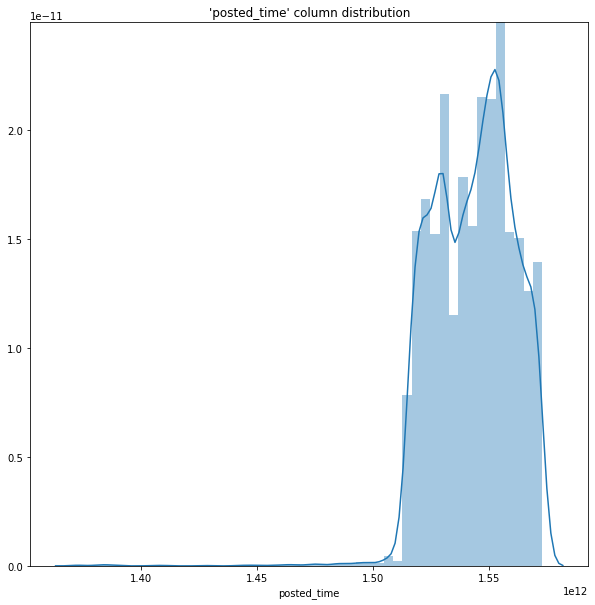

In [16]:
plt.figure(figsize=(10, 10))
plt.title("'posted_time' column distribution")

sns.distplot(train_orig_df['posted_time'])

In [6]:
TIME_FORMAT = "%Y-%m-%d %H:%M:%S"

In [7]:
t = datetime.fromtimestamp(train_df['posted_time'].iloc[1] / 1000.0)

In [8]:
t

datetime.datetime(2017, 12, 24, 12, 6, 40)

In [9]:
t.strftime(TIME_FORMAT)

'2017-12-24 12:06:40'

In [17]:
train_df = train_orig_df.copy()
train_df['datetime'] = train_df.apply(lambda row: datetime.fromtimestamp(row['posted_time'] / 1000.0), axis=1)
train_df['day_time'] = train_df.apply(lambda row: row['datetime'].time(), axis=1)
train_df['hour'] = train_df.apply(lambda row: row['day_time'].hour, axis=1)
train_df.head()

,id,posted_time,updated_time,age,updated_age,app_type,owner_id,owner_type,owner_influence,number_of_likes,...,participant5_is_employee,participant5_is_lead,participant5_is_in_connections,participant5_focus,participant5_order,participant5_influence,rank,datetime,day_time,hour
0,175339,1.514050e+12,1.514050e+12,6.315242e+10,6.315242e+10,other,57727,space,0.99973,1,...,0,0,1,other,1,0.23077,0.73677,2017-12-23 19:26:40,19:26:40,19
1,175348,1.514110e+12,1.515160e+12,6.309278e+10,6.204696e+10,forum,111913,space,0.99977,0,...,0,0,1,other,1,0.23077,0.78240,2017-12-24 12:06:40,12:06:40,12
2,175353,1.514120e+12,1.515160e+12,6.309049e+10,6.204716e+10,forum,111913,space,0.99977,0,...,0,0,1,marketing,1,0.23077,0.82125,2017-12-24 14:53:20,14:53:20,14
3,175371,1.514190e+12,1.514190e+12,6.301324e+10,6.301324e+10,other,9037,space,0.99949,0,...,0,0,1,marketing,1,0.23077,0.61522,2017-12-25 10:20:00,10:20:00,10
4,175372,1.514190e+12,1.514190e+12,6.301323e+10,6.301323e+10,other,9037,space,0.99949,0,...,0,0,1,marketing,1,0.23077,0.61522,2017-12-25 10:20:00,10:20:00,10


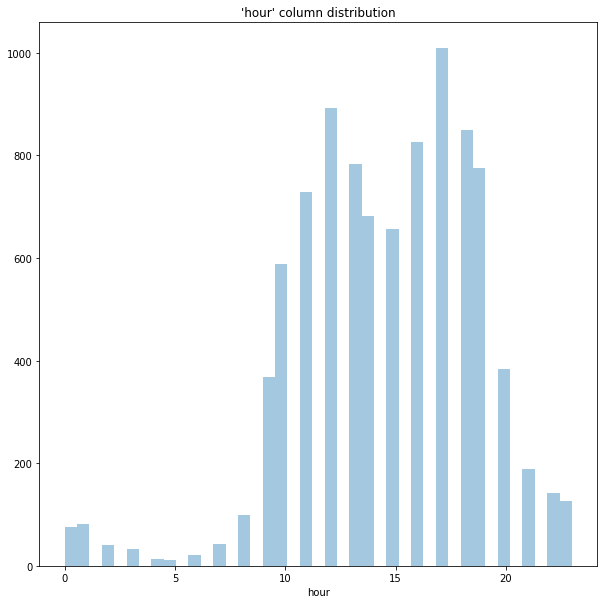

In [20]:
plt.figure(figsize=(10, 10))
plt.title("'hour' column distribution")
sns.distplot(train_df['hour'], kde=False)

### Clustering

In [21]:
from sklearn.cluster import KMeans

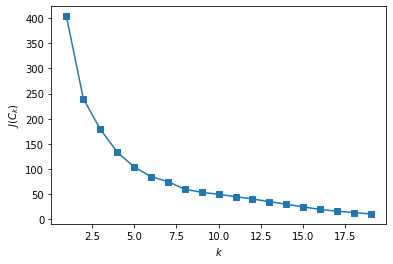

In [26]:
inertia = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(train_df['hour'].to_numpy().reshape(-1, 1))
    inertia.append(np.sqrt(kmeans.inertia_))
    
# Plotting data
plt.plot(range(1, 20), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

Possible elbow point at K ~= 5.

In [58]:
kmeans3 = KMeans(n_clusters=3, random_state=1).fit(train_df['hour'].to_numpy().reshape(-1, 1))
kmeans4 = KMeans(n_clusters=4, random_state=1).fit(train_df['hour'].to_numpy().reshape(-1, 1))
kmeans5 = KMeans(n_clusters=5, random_state=1).fit(train_df['hour'].to_numpy().reshape(-1, 1))
kmeans6 = KMeans(n_clusters=6, random_state=1).fit(train_df['hour'].to_numpy().reshape(-1, 1))
kmeans7 = KMeans(n_clusters=7, random_state=1).fit(train_df['hour'].to_numpy().reshape(-1, 1))

final_df = pd.DataFrame({'hour': train_df['hour'], 'kmeans_3': kmeans3.labels_, 'kmeans_4': kmeans4.labels_,
                         'kmeans_5': kmeans5.labels_, 'kmeans_6': kmeans6.labels_, 'kmeans_7':kmeans7.labels_})

### Visualization

#### K = 3

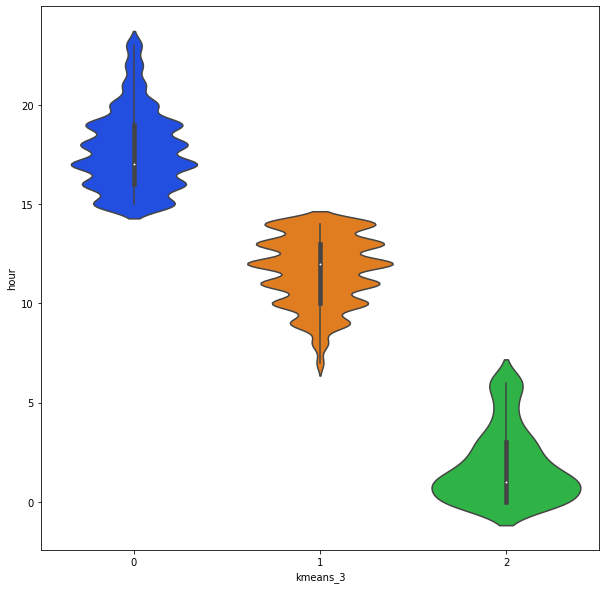

In [55]:
plt.figure(figsize=(10, 10))
sns.violinplot(x='kmeans_3', y='hour', data=final_df)

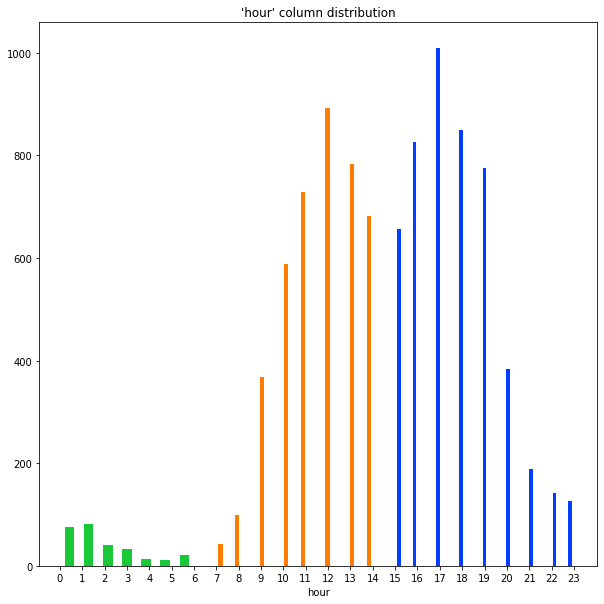

In [83]:
sns.set_palette('bright')
plt.figure(figsize=(10, 10))
plt.title("'hour' column distribution")
plt.xticks(range(24))

for k in range(3):
    sns.distplot(final_df[final_df['kmeans_3'] == k]['hour'], label=k, kde=False, 
                 hist_kws={"rwidth":0.5, 'alpha':1.0})

#### K = 4

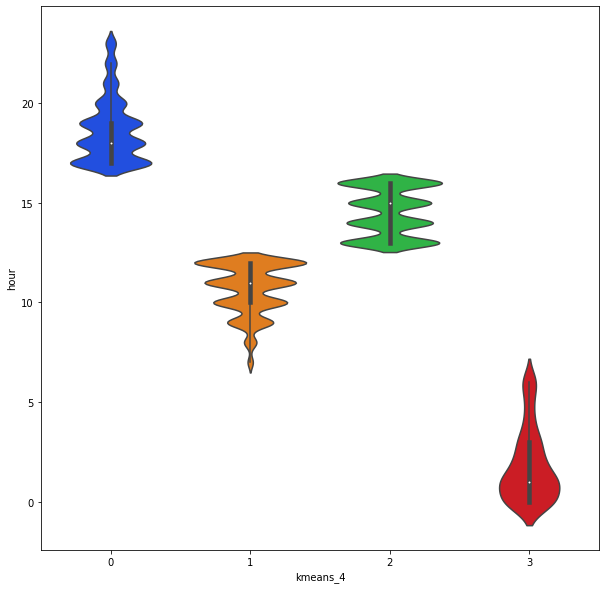

In [41]:
plt.figure(figsize=(10, 10))
sns.violinplot(x='kmeans_4', y='hour', data=final_df)

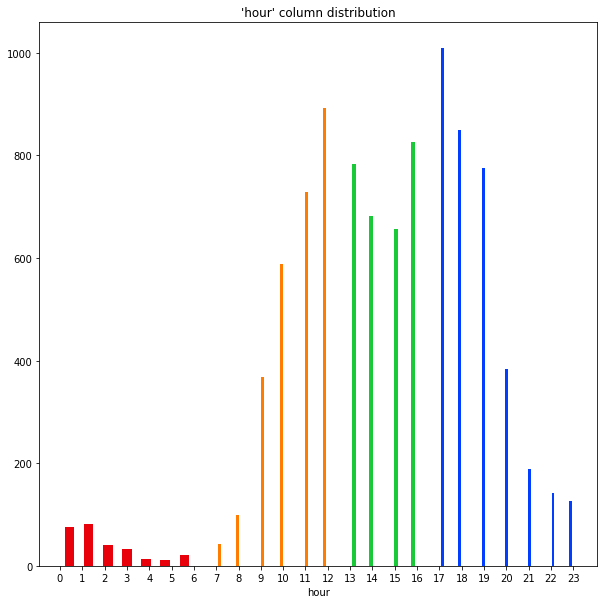

In [82]:
sns.set_palette('bright')
plt.figure(figsize=(10, 10))
plt.title("'hour' column distribution")
plt.xticks(range(24))

for k in range(4):
    sns.distplot(final_df[final_df['kmeans_4'] == k]['hour'], label=k, kde=False, 
                 hist_kws={"rwidth":0.5, 'alpha':1.0})

#### K = 5

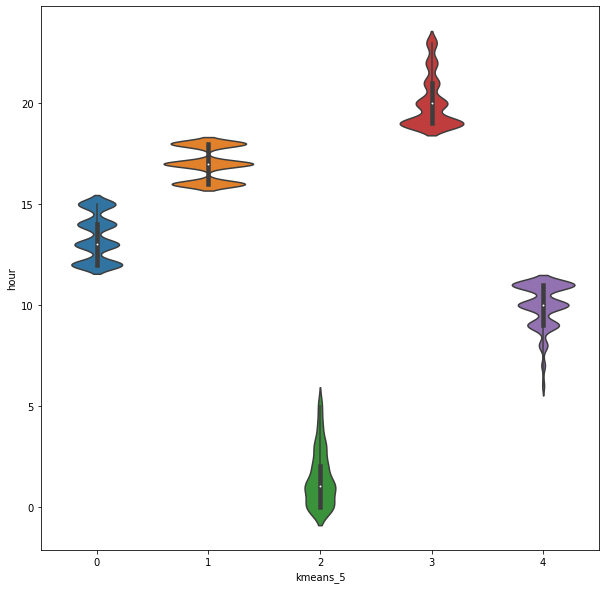

In [36]:
plt.figure(figsize=(10, 10))
sns.violinplot(x='kmeans_5', y='hour', data=final_df)

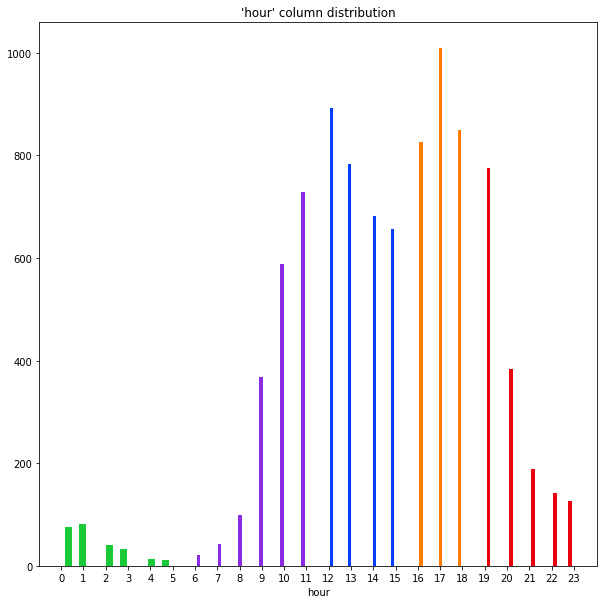

In [85]:
sns.set_palette('bright')
plt.figure(figsize=(10, 10))
plt.title("'hour' column distribution")
plt.xticks(range(24))

for k in range(5):
    sns.distplot(final_df[final_df['kmeans_5'] == k]['hour'], label=k, kde=False, 
                 hist_kws={"rwidth":0.5, 'alpha':1.0})

#### K = 6

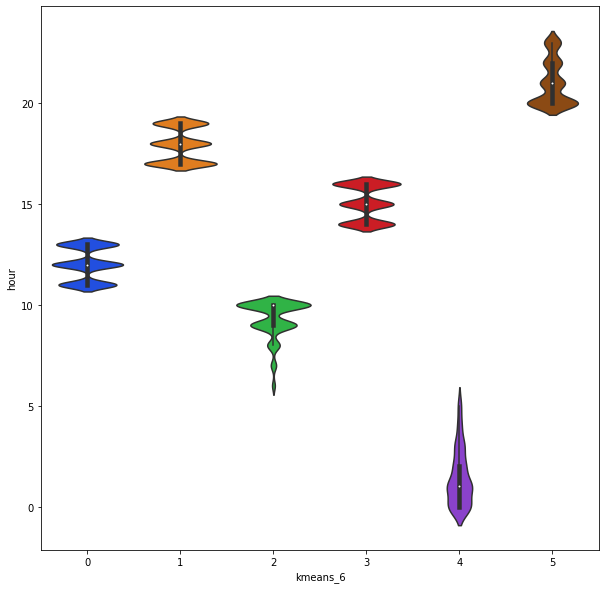

In [52]:
plt.figure(figsize=(10, 10))
sns.violinplot(x='kmeans_6', y='hour', data=final_df)

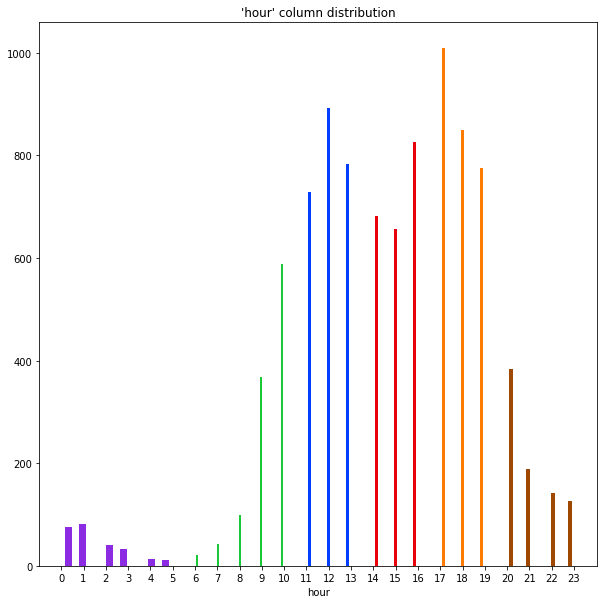

In [80]:
sns.set_palette('bright')
plt.figure(figsize=(10, 10))
plt.title("'hour' column distribution")
plt.xticks(range(24))

for k in range(6):
    sns.distplot(final_df[final_df['kmeans_6'] == k]['hour'], label=k, kde=False, 
                 hist_kws={"rwidth":0.5, 'alpha':1.0})

#### K = 7

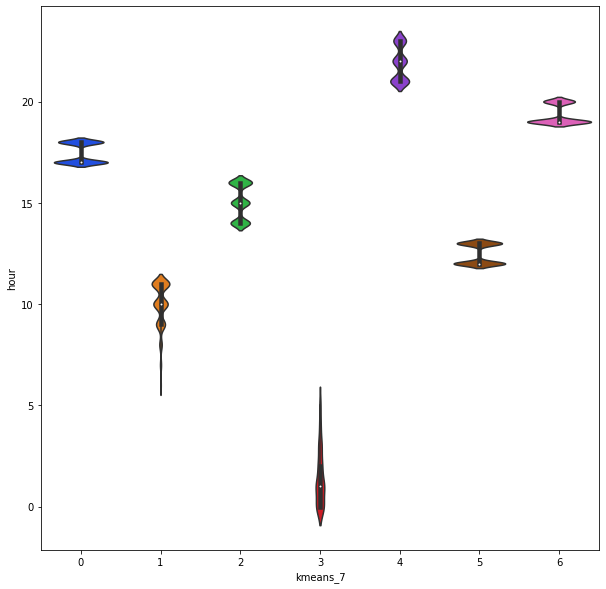

In [59]:
plt.figure(figsize=(10, 10))
sns.violinplot(x='kmeans_7', y='hour', data=final_df)

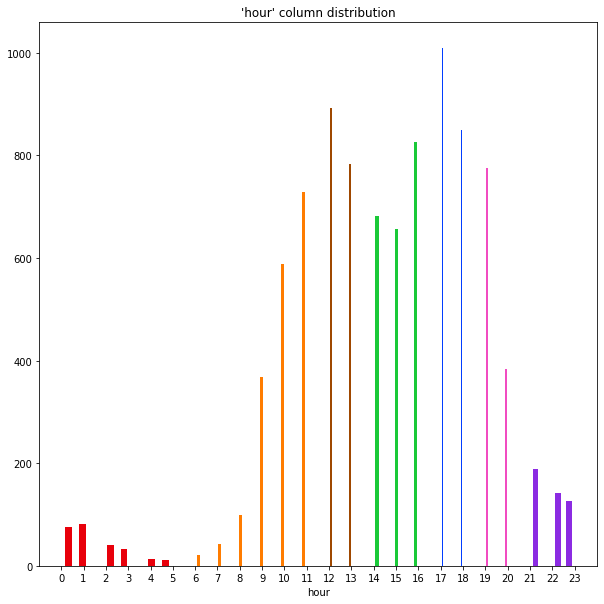

In [79]:
sns.set_palette('bright')
plt.figure(figsize=(10, 10))
plt.title("'hour' column distribution")
plt.xticks(range(24))

for k in range(7):
    g = sns.distplot(final_df[final_df['kmeans_7'] == k]['hour'], label=k, kde=False, 
                     hist_kws={"rwidth":0.5, 'alpha':1.0})